# Auswertung der "Lichtschrankenmessungen" während der Vorlesung

In [21]:
import pandas
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file into a DataFrame, set column name to raw data
df = pandas.read_csv('data.csv', names=['raw_data'])

In [23]:
data

,raw_data
0,04:54:27.239 -> Person counted. Total = 1
1,04:54:27.336 -> Person entered monitoring zone
2,04:54:28.558 -> Person entered monitoring zone
3,04:54:28.880 -> Person counted. Total = 2
4,04:54:28.944 -> Person entered monitoring zone
5,04:54:29.105 -> Person entered monitoring zone
6,04:54:29.845 -> Person entered monitoring zone
7,04:54:29.909 -> Person counted. Total = 3
8,04:54:30.134 -> Person entered monitoring zone
9,04:54:30.746 -> Person entered monitoring zone


In [30]:
# split raw_data by "->" into timestamp and values
data[['timestamp', 'values']] = data['raw_data'].str.split('->', expand=True)
# convert timestamp to datetime
data['timestamp'] = pandas.to_datetime(data['timestamp'], format='mixed')
# drop rows with no number in values column
data = data[data['values'].str.contains('\d+')]
# extract numeric values from values column
data['values'] = data['values'].str.extract('(\d+)').astype(int)
data

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_971263/2662023051.py:6: SyntaxWarning: invalid escape sequence '\d'
  data = data[data['values'].str.contains('\d+')]
/tmp/ipykernel_971263/2662023051.py:8: SyntaxWarning: invalid escape sequence '\d'
  data['values'] = data['values'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_971263/2662023051.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['values'] = data['values'].str.extract('(\d+)').astype(int)


,raw_data,timestamp,values
0,04:54:27.239 -> Person counted. Total = 1,2025-10-20 04:54:27.239,1
3,04:54:28.880 -> Person counted. Total = 2,2025-10-20 04:54:28.880,2
7,04:54:29.909 -> Person counted. Total = 3,2025-10-20 04:54:29.909,3
11,04:54:31.068 -> Person counted. Total = 4,2025-10-20 04:54:31.068,4


In [34]:
data.dtypes

raw_data             object
timestamp    datetime64[ns]
values                int64
dtype: object

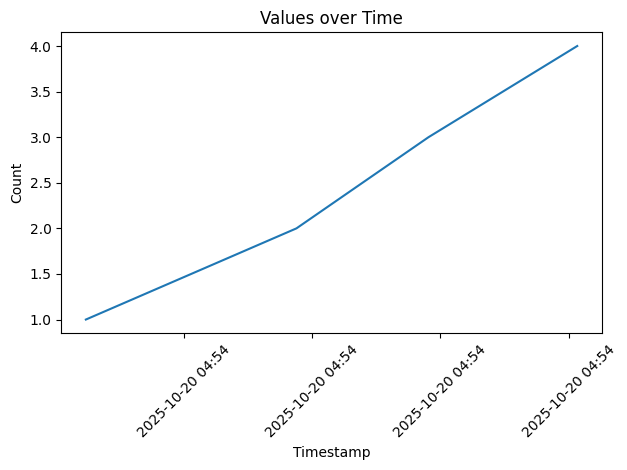

In [37]:
# plot values over time
plt.plot(data['timestamp'], data['values'])
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Values over Time')
# show hours and minutes on x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))
# change x-axis to show dates better
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()